# <span style="color:red;">**CUSTOMER SEGMENTATİON**</span>


## <span style="color:red;">**Import Dataset**</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## <span style="color:red;">**Read Dataset**</span>

In [2]:
df0 = pd.read_csv("Train.csv")
df = df0.copy()
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000,Low,4.000,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.000,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000,Low,1.000,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000,High,2.000,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.000,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.000,Low,7.000,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.000,Low,4.000,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.000,Low,1.000,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.000,Low,4.000,Cat_6,B


<h2 style="text-align: center; color: red;">Customer Segmentation Dataset Variables</h2>

<table style="width:100%; border-collapse: collapse; text-align: center;">
  <tr style="background-color: red; color: white;">
    <th style="padding: 10px; border: 1px solid black;">Variable</th>
    <th style="padding: 10px; border: 1px solid black;">Definition</th>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">ID</td>
    <td style="padding: 10px; border: 1px solid black;">Unique ID</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Gender</td>
    <td style="padding: 10px; border: 1px solid black;">Gender of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Ever_Married</td>
    <td style="padding: 10px; border: 1px solid black;">Marital status of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Age</td>
    <td style="padding: 10px; border: 1px solid black;">Age of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Graduated</td>
    <td style="padding: 10px; border: 1px solid black;">Is the customer a graduate?</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Profession</td>
    <td style="padding: 10px; border: 1px solid black;">Profession of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Work_Experience</td>
    <td style="padding: 10px; border: 1px solid black;">Work Experience in years</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Spending_Score</td>
    <td style="padding: 10px; border: 1px solid black;">Spending score of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Family_Size</td>
    <td style="padding: 10px; border: 1px solid black;">Number of family members for the customer (including the customer)</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Var_1</td>
    <td style="padding: 10px; border: 1px solid black;">Anonymised Category for the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Segmentation</td>
    <td style="padding: 10px; border: 1px solid black;">(Target) Customer Segment of the customer</td>
  </tr>
</table>


## <span style="color:red;">**EDA**</span>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
df.shape

(8068, 11)

In [5]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [6]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [7]:
numeric_list = ['Age', 'Work_Experience', 'Family_Size']
categorical_list = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

In [8]:
df.select_dtypes(include= "object")

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A
...,...,...,...,...,...,...,...
8063,Male,No,No,NaN,Low,Cat_1,D
8064,Male,No,No,Executive,Low,Cat_4,D
8065,Female,No,Yes,Healthcare,Low,Cat_6,D
8066,Female,No,Yes,Healthcare,Low,Cat_6,B


In [9]:
df.select_dtypes(include= "object").describe().T

,count,unique,top,freq
Gender,8068,2,Male,4417
Ever_Married,7928,2,Yes,4643
Graduated,7990,2,Yes,4968
Profession,7944,9,Artist,2516
Spending_Score,8068,3,Low,4878
Var_1,7992,7,Cat_6,5238
Segmentation,8068,4,D,2268


In [10]:
df["Profession"].value_counts()

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

In [11]:
for col in df.select_dtypes(include = "object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("***********")

Gender
***
Gender
Male      4417
Female    3651
Name: count, dtype: int64
***********
Ever_Married
***
Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64
***********
Graduated
***
Graduated
Yes    4968
No     3022
Name: count, dtype: int64
***********
Profession
***
Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64
***********
Spending_Score
***
Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64
***********
Var_1
***
Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64
***********
Segmentation
***
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64
***********


In [12]:

yes_graduated_min_age = df[df['Graduated'] == 'Yes']['Age'].min()
yes_graduated_max_age = df[df['Graduated'] == 'Yes']['Age'].max()


no_graduated_min_age = df[df['Graduated'] == 'No']['Age'].min() if 'No' in df['Graduated'].unique() else None
no_graduated_max_age = df[df['Graduated'] == 'No']['Age'].max() if 'No' in df['Graduated'].unique() else None

print(f"'Yes' olanların en küçük yaşı: {yes_graduated_min_age}")
print(f"'Yes' olanların en büyük yaşı: {yes_graduated_max_age}")
print(f"'No' olanların en küçük yaşı: {no_graduated_min_age}")
print(f"'No' olanların en büyük yaşı: {no_graduated_max_age}")

'Yes' olanların en küçük yaşı: 18
'Yes' olanların en büyük yaşı: 89
'No' olanların en küçük yaşı: 18
'No' olanların en büyük yaşı: 89


In [13]:
# Ever_Married sütununda NaN olan ve Family_Size değeri 2.0'dan büyük olan satırları 'Yes' ile doldur
df.loc[(df['Ever_Married'].isna()) & (df['Family_Size'] >= 2.0), 'Ever_Married'] = 'Yes'

# Sonucu göster
print(df)

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0               1.000            Low        4.000  Cat_4            D  
1                 NaN        Average        3.000  

In [14]:
# Ever_Married sütununda NaN olan ve Family_Size değeri 2.0'dan büyük olan satırları 'Yes' ile doldur
df.loc[(df['Ever_Married'].isna()) & (df['Family_Size'] < 2.0), 'Ever_Married'] = 'No'

# Sonucu göster
print(df)

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0               1.000            Low        4.000  Cat_4            D  
1                 NaN        Average        3.000  

In [15]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        12
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

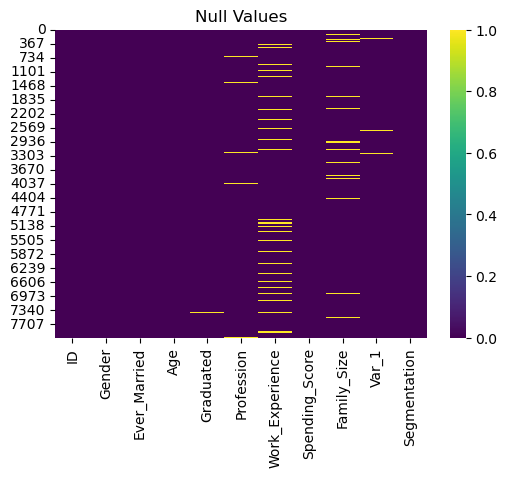

In [16]:
# Null values heatmap:
plt.figure(figsize = (6,4))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Null Values')
plt.show()

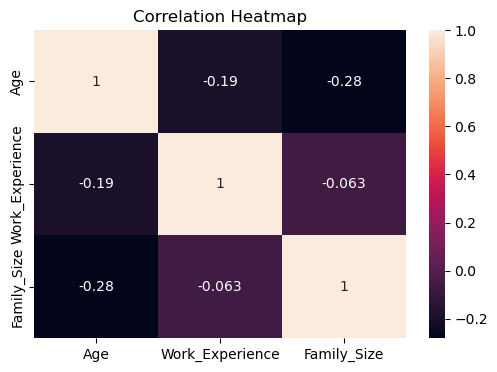

In [17]:
# Correlation heatmap
plt.figure(figsize = (6,4))
sns.heatmap(df[numeric_list].corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()